# **Project: Banking Campaign Output Prediction**

# **Dataset**

Before running the notebook, please make sure to upload **bank-additional-full.csv** from moodle.

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')  # Assuming the separator is ';'

# Inspect the first few rows of the dataset to understand its structure
pd.DataFrame(data).head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

# **Data Preprocessing**

## **Handling Missing Values**

In [ ]:
# Checking for missing values
missing_values = data.isna().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# But we notice from inspecting head of our dataframe that there are some "unknown" values.
# We convert them to standard NA values of pandas
data = data.replace('unknown', pd.NA)
print(data.isna().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
print("Before drop na", data.shape)
data = data.dropna(how='any')
print("After drop na", data.shape)

Before drop na (41188, 21)
After drop na (30488, 21)


## **Handling Duplicate Values**

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)
print("Total removed:", duplicate_rows.shape[0])

Before removing duplicates: (30488, 21)
After removing duplicates: (30478, 21)
Total removed: 10


## **Handling Outliers**

In [ ]:
# Function to detect and remove outliers using the IQR method
def remove_outliers(df, column_names):
    clean_df = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers from the dataframe
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    return clean_df

# Numerical columns to check for outliers
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data, numerical_columns)

# Compare the shapes of the original and cleaned datasets to understand the impact
original_shape = data.shape
cleaned_shape = data_no_outliers.shape
data = data_no_outliers

(original_shape, cleaned_shape)

((30478, 21), (23774, 21))

## **Encoding**

In [ ]:
# Check the unique values for categorical columns to understand the encoding needs
unique_values = {column: data[column].unique() for column in data.select_dtypes(include=['object']).columns}
(unique_values)

{'job': array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
        'unemployed', 'retired', 'entrepreneur', 'management', 'student',
        'self-employed'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
        'basic.9y', 'university.degree', 'illiterate'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

### **Label Encoding**

In [ ]:
# For "y", "default", "housing", "loan", we do label encoding
# For rest, we do one-hot encoding for the rest

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoding_cols = ["y", "default", "housing", "loan"]

# Apply encoding to each categorical column
for column in data.columns:
  if data[column].dtype == 'object' and column in label_encoding_cols:
      data[column] = label_encoder.fit_transform(data[column])

### **One-hot encoding**

In [ ]:
# Selecting categorical columns for encoding
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Check data types to verify encoding
print(data.dtypes)

age                                int64
default                            int64
housing                            int64
loan                               int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married 

## **Removing Unnecessary Features**

In [ ]:
# Remove the 'duration' column as it should not be used for a realistic predictive model
data = data.drop(columns=['duration'])

## **Balancing Dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the counts of original and resampled classes
print("Original class distribution:")
print(y.value_counts())
print("\nAfter SMOTE class distribution:")
print(y_resampled.value_counts())

Original class distribution:
0    21462
1     2312
Name: y, dtype: int64

After SMOTE class distribution:
0    21462
1    21462
Name: y, dtype: int64


## **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## **Heatmap Correlation**

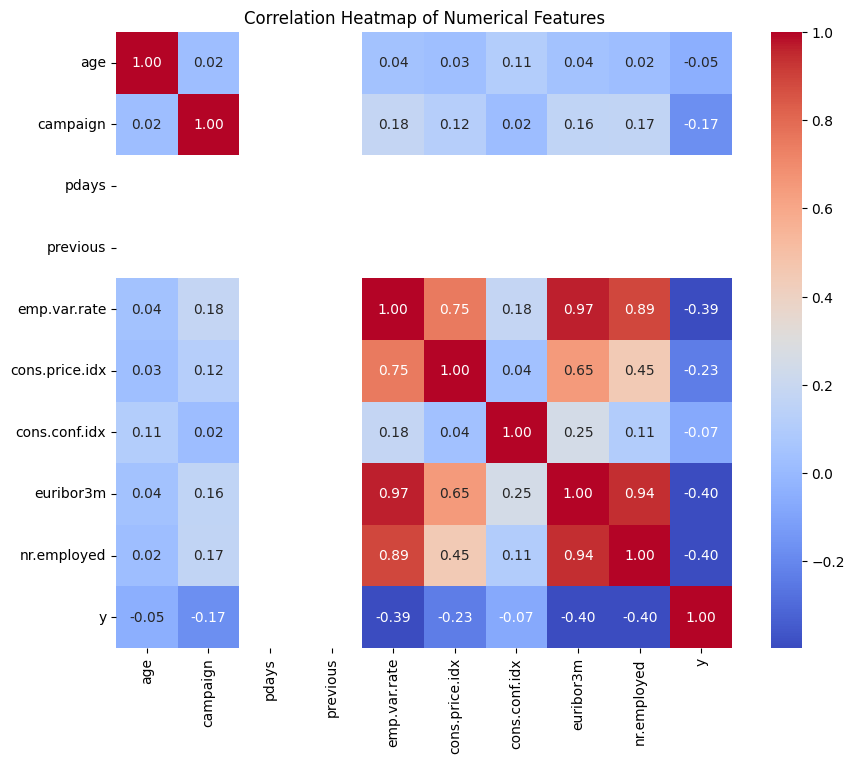

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# For the heatmap, we'll use a correlation matrix of the numerical columns in the dataset
# As the one-hot encoded variables are binary, including them might not provide much insight in a heatmap
# Hence, we'll focus on the original numerical columns for this heatmap

# Select numerical columns
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Calculate correlation matrix
corr_matrix = pd.concat([X_resampled, y_resampled], axis=1)[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Predictive Model**

## **Helper Functions**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def display_accuracy(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  # Visualize the accuracy
  plt.figure(figsize=(6, 4))
  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.ylim(0, 1)  # Set y-axis limits to show percentage from 0 to 100%
  plt.axhline(y=accuracy, color='blue', linestyle='--')
  plt.text(0, accuracy, f'{accuracy:.2f}', color='blue', va='bottom', ha='center')
  plt.show()

def display_confusion_matrix(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Visualize the confusion matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
              xticklabels=['Not Subscribed (Pred)', 'Subscribed (Pred)'],
              yticklabels=['Not Subscribed (True)', 'Subscribed (True)'])
  plt.title('Confusion Matrix for Logistic Regression Model')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

def display_classification_report(y_test, y_pred):
  # Prepare data for the classification report heatmap
  report_dict = classification_report(y_test, y_pred, output_dict=True)
  report_df = pd.DataFrame(report_dict).transpose().round(2)

  # Remove the 'support' column to focus on precision, recall, f1-score
  report_df = report_df.drop(columns=['support'])
  # Visualize the classification report
  plt.figure(figsize=(8, 6))
  sns.heatmap(report_df.iloc[:-3, :], annot=True, cmap='Blues', fmt='g', cbar=True)  # Exclude last 3 rows (accuracy, macro avg, weighted avg)
  plt.title('Classification Report')
  plt.ylabel('Class')
  plt.xlabel('Metrics')
  plt.show()

## **Logistic Regression**

**Overview:** Logistic Regression is a fundamental statistical approach that models the probability of a binary outcome based on one or more independent variables. It's particularly well-suited for binary classification problems.
Advantages:

**Interpretability:** Logistic regression coefficients can be easily interpreted in terms of the odds ratios, making it straightforward to understand the effect of each feature on the likelihood of subscription.

**Efficiency:** It's computationally inexpensive and provides quick predictions after the model has been fit.

**Performance:** Despite its simplicity, logistic regression can perform remarkably well on linearly separable problems.

**Considerations:** It assumes a linear relationship between the log-odds of the dependent variable and the independent variables. It might not capture complex relationships as effectively as more sophisticated models.

### **Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)

### **Accuracy**

<ipython-input-284-4ee8a2f2be80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')


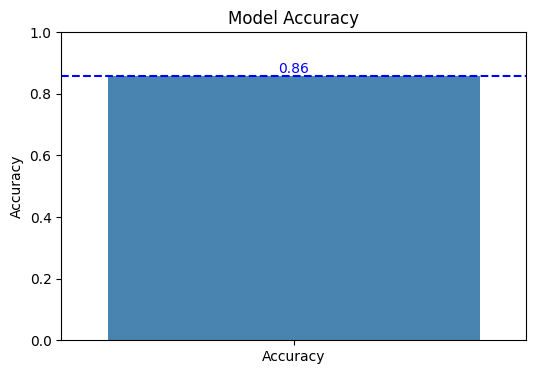

In [ ]:
display_accuracy(y_test, y_pred)

### **Confusion Matrix**

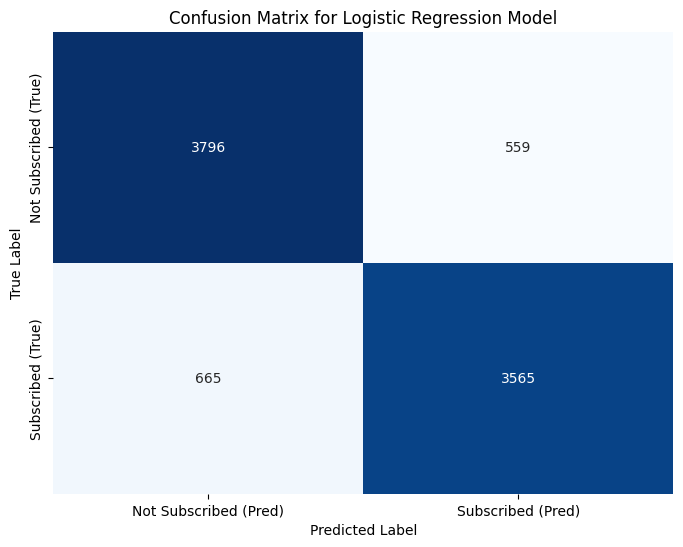

In [ ]:
display_confusion_matrix(y_test, y_pred)

### **Classification Report**

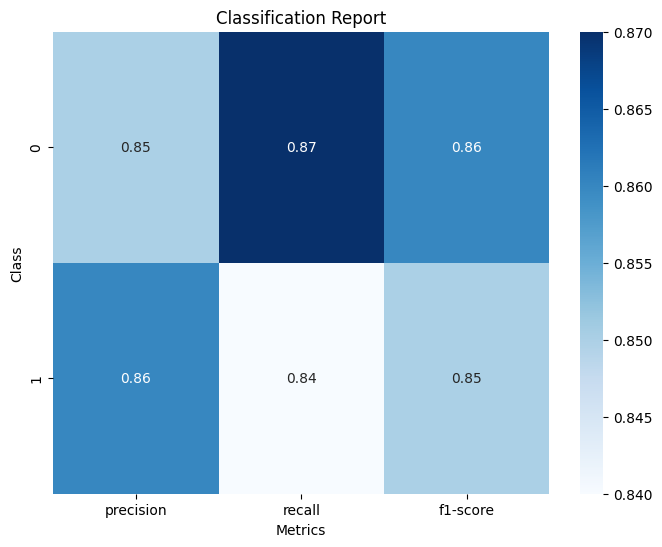

In [ ]:
display_classification_report(y_test, y_pred)

## **Random Forest**

**Overview:** The Random Forest Classifier is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

**Handling Non-linearity:** It can handle non-linear data efficiently, making it suitable for datasets where relationships between variables are not linear.
Feature Importance: Random Forest can provide insights into which features are most important in predicting the target variable, which is valuable for understanding the underlying decision-making process.
**Robustness:** It's less prone to overfitting than decision trees, especially with a large number of trees in the forest.

**Considerations:** Random Forest models can be more complex and require more computational resources. The model's predictions might also be less interpretable compared to logistic regression.

### **Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the encoded and scaled training data
random_forest.fit(X_train, y_train)

# Predict on the testing set using the Random Forest model
y_pred_rf = random_forest.predict(X_test)

### **Accuracy**

<ipython-input-284-4ee8a2f2be80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')


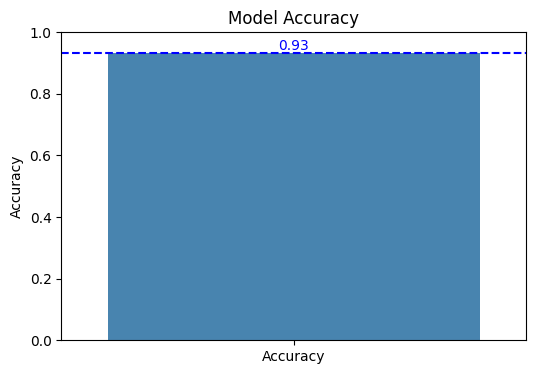

In [ ]:
display_accuracy(y_test, y_pred_rf)

### **Confusion Matrix**

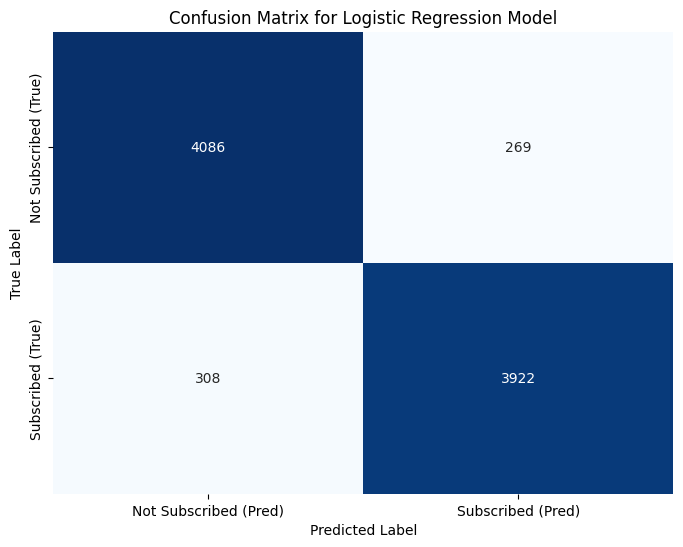

In [ ]:
display_confusion_matrix(y_test, y_pred_rf)

### **Classification Report**

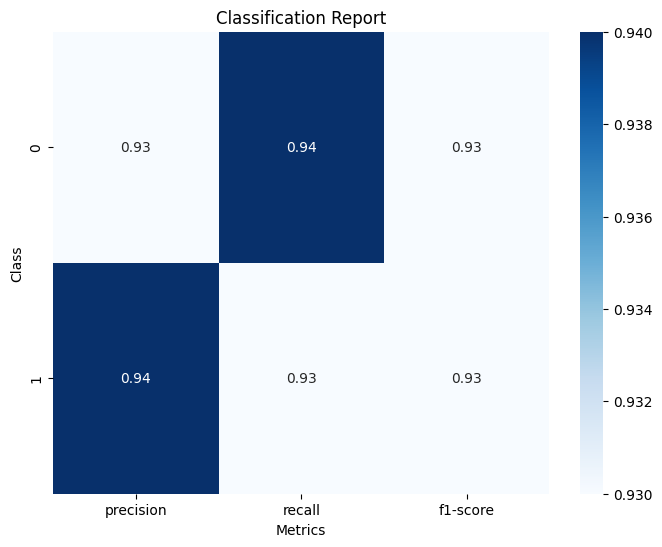

In [ ]:
display_classification_report(y_test, y_pred_rf)

# **Results and Insights**

The main challenge for the project was dealing with raw and unbalanced dataset. Due to this purpose, classification report of both models showed low recall for class 1. After thorough data preprocessing, we were able to balance and clean the dataset successfully.

The Random Forest model outperformed the Logistic Regression model across all metrics. It has a higher accuracy, fewer false predictions, and higher precision and recall scores. These results suggest that the Random Forest model is better suited for this dataset and prediction task, likely due to its ability to capture more complex patterns and interactions between features. It is important to note that while Random Forest shows superior performance, it might also be more computationally intensive and less interpretable than Logistic Regression.